In [1]:
%pip install flaml[notebook]==1.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from flaml.data import load_openml_dataset
X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=43926, data_dir='./')
print("Data type:", type(X_train), type(y_train))
print("The first 5 rows of X_train:")
print(X_train.head())
print("The first 5 rows of y_train:")
print(y_train.head())

load dataset from ./openml_ds43926.pkl
Dataset name: ames_housing
X_train.shape: (2197, 80), y_train.shape: (2197,);
X_test.shape: (733, 80), y_test.shape: (733,)
Data type: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
The first 5 rows of X_train:
                               MS_SubClass                   MS_Zoning  \
896   One_and_Half_Story_Finished_All_Ages     Residential_Low_Density   
1901   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
390    One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
1293  One_and_Half_Story_Finished_All_Ages  Residential_Medium_Density   
1767              Two_Story_1946_and_Newer     Residential_Low_Density   

      Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
896           50.0    8405.0   Pave  No_Alley_Access             Regular   
1901          50.0    5000.0   Pave  No_Alley_Access             Regular   
390           78.0   10140.0   Pave  No_Alley_Acce

In [3]:
from flaml import AutoML
automl = AutoML()

In [4]:
settings = {
    "time_budget": 600,  # total running time in seconds
    "metric": 'r2',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "estimator_list": ['xgboost', 'lgbm', 'catboost', 'rf'],
    "task": 'regression',  # task type
    "log_file_name": 'houses.log',  # flaml log file
    "seed": 423874,    # random seed
}

In [5]:
automl.fit(X_train, y_train, **settings)

[flaml.automl: 11-23 20:40:08] {2540} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 11-23 20:40:08] {2542} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 11-23 20:40:08] {2545} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 11-23 20:40:08] {2664} INFO - Minimizing error metric: 1-r2
INFO:flaml.automl:Minimizing error metric: 1-r2
[flaml.automl: 11-23 20:40:08] {2806} INFO - List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'catboost', 'rf']
INFO:flaml.automl:List of ML learners in AutoML Run: ['xgboost', 'lgbm', 'catboost', 'rf']
[flaml.automl: 11-23 20:40:08] {3108} INFO - iteration 0, current learner xgboost
INFO:flaml.automl:iteration 0, current learner xgboost
[flaml.automl: 11-23 20:40:09] {3242} INFO - Estimated sufficient time budget=8453s. Estimated necessary time budget=10s.
INFO:flaml.automl:Estimated sufficient time budget=8453s. Estimated necessary time bud

In [7]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 563, 'num_leaves': 5, 'min_child_samples': 71, 'learning_rate': 0.0694024322956206, 'log_max_bin': 7, 'colsample_bytree': 0.8485192283640752, 'reg_alpha': 0.2009534125903372, 'reg_lambda': 3.5161945937454018}
Best r2 accuracy on validation data: 0.9138
Training duration of best run: 0.4495 s


<BarContainer object of 80 artists>

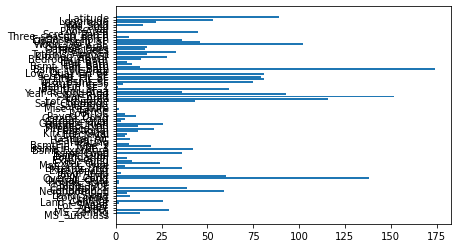

In [8]:
import matplotlib.pyplot as plt
plt.barh(automl.feature_names_in_, automl.feature_importances_)

In [9]:
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)

Predicted labels [188559.61767832 153010.70412858 276941.96808972 132234.17357413
  94164.91301945 182310.3077009   36818.96188179 132002.55832555
 164343.10928408 107217.99776768 219481.59490084 132840.57261629
 313233.16078135 145629.80253534 209475.00385466 146789.67209763
 174409.11160666 125212.67558185 201299.08879092 116269.01330741
 192608.73407864 335842.98998241 213957.04729358 154597.90734742
 199782.31124708 124153.85482577 208899.12994924 297622.18584517
 299665.10475233 437140.8253326  191324.06964535 237301.24102269
 119733.64031913 116087.57651555 177302.12293967 205428.29580426
 194085.73067473 161579.54224741 200166.19977057 168040.25916189
 298630.71705286 138552.0470258  337148.27100389 205350.45173204
 268452.15035418 477699.48582474 137556.32784487 253092.52580532
 132433.47462831 203956.49950397 132558.22818671 101665.77245115
 139299.38581469 246498.87035997 151649.10630594 112890.28516888
 337302.80221318 111460.40315563  92205.19280857 252732.88366677
 210193.

In [11]:
from flaml.ml import sklearn_metric_loss_score
#print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = 0.8851201052892462
mse = 748746104.4039737
mae = 15136.546803986184


In [12]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'xgboost', 'Current Sample': 2197, 'Current Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'xgboost', 'Best Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 2197, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.099

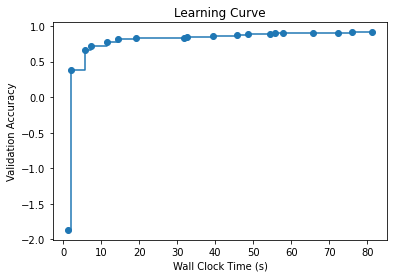

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [14]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
Y_train = label_encoder.transform(y_train)

In [16]:
lgbm.fit(X_train, Y_train)

LGBMClassifier()

In [17]:
y_pred_lgbm = lgbm.predict(X_test)

In [26]:
#print('default xgboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_xgb, Y_test))
print('default lgbm accuracy', '=', 1 - sklearn_metric_loss_score('r2', y_pred_lgbm, Y_test))
#print('default catboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_cat, Y_test))
print('flaml (5 min) r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

default lgbm accuracy = -2.396349102536697
flaml (5 min) r2 = 0.8851201052892462
r2 = 0.8851201052892462
mse = 748746104.4039737
mae = 15136.546803986184
